In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import extract_uses.utils as eu_utils
import loaders

city_ref = "chandigarh_india"
# cities_folder = 'cities/'

# uses_shp = cities_folder+city_ref+"/full_uses.shp"
bbox = [30.619908486247496, 76.6184599, 30.7775464, 76.90148712478653] # eu_utils.getBoundingBox(uses_shp)

# geo_graph = loaders.load_graph(city_country, bbox)
pois = loaders.load_pois(city_ref) # , uses_shp)
# centrality = loaders.load_graph_centrality(city_country, geo_graph)
kde = loaders.load_grid_kde(city_ref) #, pois, bbox)

Querying locally for `['pois']`
Found ['pois'] stored locally
Querying locally for `['activity', 'residential', 'total']`
Found ['activity', 'residential', 'total'] stored locally


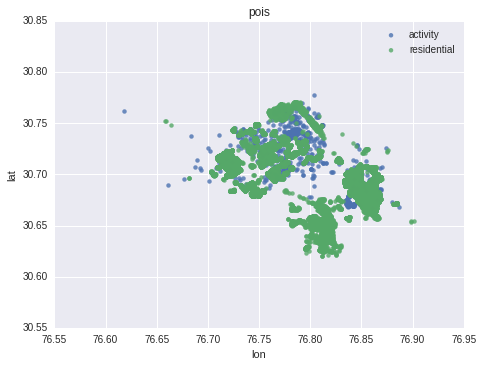

In [3]:
import plots

plots.pois_scatter(pois, overlap=True)

In [4]:
import kde as kde_module
import utils

bbox_sub = [30.7106, 76.7688, 30.7369, 76.8060]

pois_sub = pois[(pois['lon'] > bbox_sub[1]) & (pois['lon'] < bbox_sub[3]) & (
    pois['lat'] > bbox_sub[0]) & (pois['lat'] < bbox_sub[2])]

xx_sub, yy_sub = utils.grid_from_bbox(bbox_sub, .0025)

kde_sub = kde_module.get_grid_all_kde(pois_sub, bbox_sub, .0025)

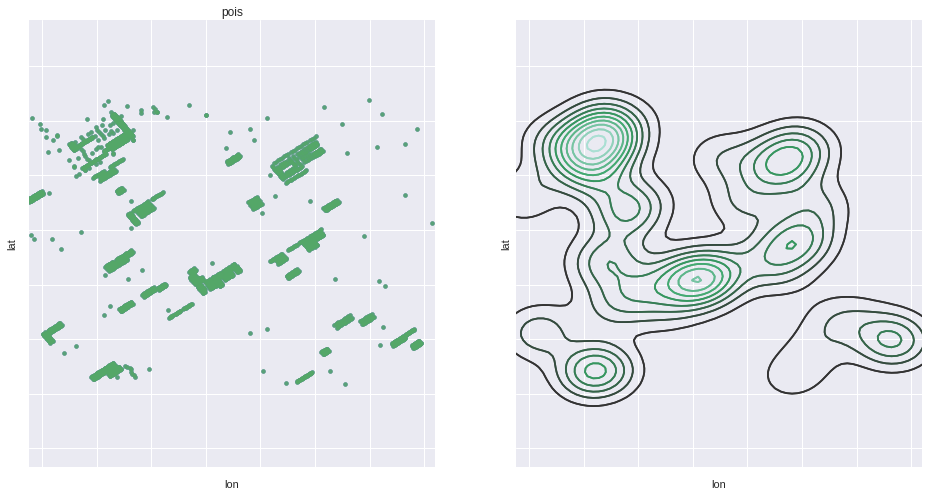

In [9]:
plots.pois_scatter_kde(pois_sub, overlap=True, xlim=[bbox_sub[1], bbox_sub[3]], ylim=[bbox_sub[0], bbox_sub[2]])

In [10]:
import spatial_measures
import utils

xx, yy = utils.grid_from_bbox(bbox, .0025)

f = spatial_measures.grid_cell_pois_count(pois, xx, yy)

In [11]:
# entropy = spatial_measures.relative_entropy(f)
moran = spatial_measures.moran_index(f, xx, yy)
geary = spatial_measures.geary_index(f, xx, yy)

In [12]:
print(moran, geary)

(0.060414178258639435, 1.044766987199647)


In [14]:
f_act_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='activity'], xx, yy)
f_res_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='residential'], xx, yy)
f_act_kde = spatial_measures.grid_cell_kde_average(kde['activity'].values)
f_res_kde = spatial_measures.grid_cell_kde_average(kde['residential'].values)

In [15]:
moran_act_count = spatial_measures.moran_index(f_act_count, xx, yy)
moran_res_count = spatial_measures.moran_index(f_res_count, xx, yy)
geary_act_count = spatial_measures.geary_index(f_act_count, xx, yy)
geary_res_count = spatial_measures.geary_index(f_res_count, xx, yy)

moran_act_kde = spatial_measures.moran_index(f_act_kde, xx, yy)
moran_res_kde = spatial_measures.moran_index(f_res_kde, xx, yy)
geary_act_kde = spatial_measures.geary_index(f_act_kde, xx, yy)
geary_res_kde = spatial_measures.geary_index(f_res_kde, xx, yy)

entropy_act_kde = spatial_measures.relative_entropy(f_act_kde)
entropy_res_kde = spatial_measures.relative_entropy(f_res_kde)

In [17]:
print("Moran")
print("\tActivities: count %f, kde %f" % (moran_act_count, moran_act_kde))
print("\tResidential: count %f, kde %f" % (moran_res_count, moran_res_kde))

print("Geary")
print("\tActivities: count %f, kde %f" % (geary_act_count, geary_act_kde))
print("\tResidential: count %f, kde %f" % (geary_res_count, geary_res_kde))

print("Entropy")
print("\tActivities: kde %f" % entropy_act_kde)
print("\tResidential: kde %f" % entropy_res_kde)

Moran
	Activities: count 0.024858, kde 0.306005
	Residential: count 0.059735, kde 0.132520
Geary
	Activities: count 1.078705, kde 0.647133
	Residential: count 1.045628, kde 0.852638
Entropy
	Activities: kde 0.796355
	Residential: kde 0.829336
